In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\l\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\l\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 120ms/step - loss: 3.1704 - accuracy: 0.3627 - val_loss: 1.7782 - val_accuracy: 0.6240
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.5614 - accuracy: 0.6766 - val_loss: 1.3237 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 1.1010 - accuracy: 0.7634 - val_loss: 1.1330 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.8654 - accuracy: 0.8152 - val_loss: 1.0387 - val_accuracy: 0.7700
Epoch 5/20
16/16 [==============================] - 1s 36ms/step - loss: 0.7019 - accuracy: 0.8524 - val_loss: 0.9631 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5378 - accuracy: 0.8909 - val_loss: 0.9394 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 27ms/step - loss: 0.4428 - accuracy: 0.9088 - val_loss: 0.9073 - val_accuracy: 0.8140
Epoch 8/20
1

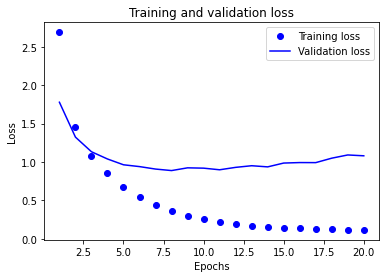

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

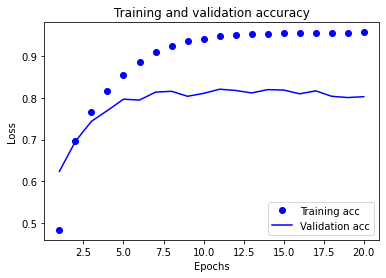

In [18]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 43ms/step - loss: 3.1660 - accuracy: 0.4017 - val_loss: 1.7433 - val_accuracy: 0.6580
Epoch 2/8
16/16 [==============================] - 0s 29ms/step - loss: 1.5281 - accuracy: 0.6940 - val_loss: 1.3047 - val_accuracy: 0.7230
Epoch 3/8
16/16 [==============================] - 1s 36ms/step - loss: 1.1038 - accuracy: 0.7599 - val_loss: 1.1351 - val_accuracy: 0.7370
Epoch 4/8
16/16 [==============================] - 1s 35ms/step - loss: 0.8417 - accuracy: 0.8144 - val_loss: 1.0226 - val_accuracy: 0.7810
Epoch 5/8
16/16 [==============================] - 0s 24ms/step - loss: 0.7012 - accuracy: 0.8525 - val_loss: 0.9650 - val_accuracy: 0.8000
Epoch 6/8
16/16 [==============================] - 0s 28ms/step - loss: 0.5371 - accuracy: 0.8923 - val_loss: 0.9421 - val_accuracy: 0.7890
Epoch 7/8
16/16 [==============================] - 0s 27ms/step - loss: 0.4583 - accuracy: 0.9047 - val_loss: 0.8957 - val_accuracy: 0.8070
Epoch 8/8
71/71 [===

In [20]:
results

[0.9791150093078613, 0.7880676984786987]

In [21]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18432769367764915

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

1.0

In [25]:
np.argmax(predictions[0])

3

In [26]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [27]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 3.0220 - accuracy: 0.2862 - val_loss: 1.6907 - val_accuracy: 0.6150
Epoch 2/20
63/63 [==============================] - 1s 12ms/step - loss: 1.5679 - accuracy: 0.6467 - val_loss: 1.4153 - val_accuracy: 0.6580
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 1.2447 - accuracy: 0.6823 - val_loss: 1.3133 - val_accuracy: 0.6930
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0904 - accuracy: 0.7263 - val_loss: 1.2700 - val_accuracy: 0.6990
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 0.9668 - accuracy: 0.7527 - val_loss: 1.2482 - val_accuracy: 0.7030
Epoch 6/20
63/63 [==============================] - 1s 12ms/step - loss: 0.8895 - accuracy: 0.7581 - val_loss: 1.2603 - val_accuracy: 0.7120
Epoch 7/20
63/63 [==============================] - 1s 12ms/step - loss: 0.8152 - accuracy: 0.7750 - val_loss: 1.2857 - val_accuracy: 0.7080
Epoch 8/20
63